In [1]:
from __future__ import annotations

import particle_in_a_box as pib
import numpy as np
from matplotlib import pyplot as plt
import default_plot as dp

lightColor = "#8bb1cc"
darkColor = "#0f4c75"

plt.rcParams["text.usetex"] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Dejavu Serif'
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['animation.writer'] = 'ffmpeg'
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\bin\\ffmpeg.exe'

In [2]:
gamma = 10
L = np.pi
m = 1
states = [1,2,3,4,5,6]
amps = [1,0.5,0.25,0.125,0.1,0.1]


myState = pib.Particle_in_Box_State("symmetric", L, m, states, amps, gamma)
myState.case = "dirichlet_neumann"

adding state(s):  [1, 2, 3, 4, 5, 6]
current config:  [1, 2, 3, 4, 5, 6]


removing state(s):  [1, 2, 3, 4, 5, 6]
current config:  []
adding state(s):  [2, 3]
current config:  [2, 3]
setting L...(particle_in_a_box)
setting L...(state_properties)
auto setting time to:  2.0943951023931953


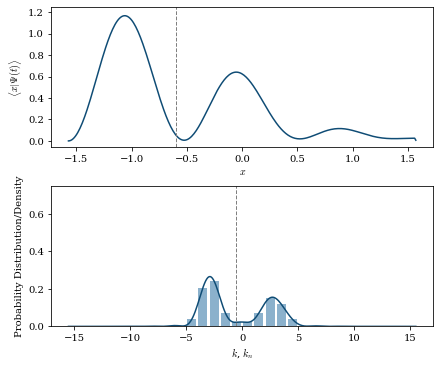

In [3]:
fig = plt.figure(constrained_layout = True, figsize=(6,5))
gs = fig.add_gridspec(nrows=2, ncols=1)

myState.reset()
myState.add_state([2,3], [1,1])
myState.L = np.pi
myState.m = 1

position_plot = dp.Position_Space_Plot(myState, fig, gs, [0,0])
momentum_plot = dp.Momentum_Space_Plot(myState, fig, gs, [1,0])

position_plot.expectation_value = True
momentum_plot.expectation_value = True

combined_plot = dp.Multi_Plot(position_plot, momentum_plot)
combined_plot.animate(20, 2, 1)


removing state(s):  [2, 3]
current config:  []
adding state(s):  [2, 3]
current config:  [2, 3]


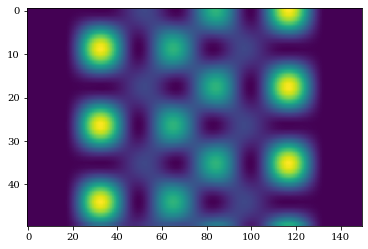

In [4]:
carpet_plot = dp.Carpet_Plot(myState)
carpet_plot.x_interval = [-2, 2]

myState.reset()
myState.add_state([2,3], [1,1])
myState.m = 1
myState.case = "dirichlet"

carpet_plot.x_res = 150
time = np.linspace(0, 5, 50)
carpet_plot.plot(time)


setting L...(particle_in_a_box)
setting L...(state_properties)


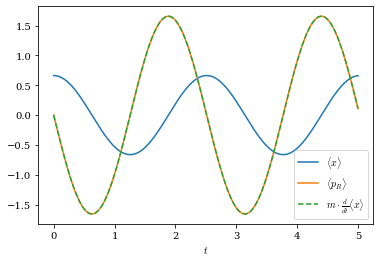

In [5]:
expectation_value_plot = dp.Expectation_Value_Plot(myState)

myState.case = "neumann"
myState.gamma = 0.0001
myState.L = np.pi
myState.m = 1

expectation_value_plot.plot(np.linspace(0, 5, 500))
expectation_value_plot.axis.legend()

115


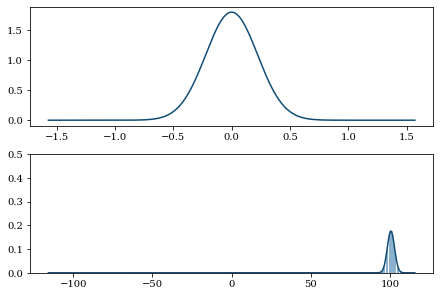

In [4]:
# Gaussian Playground
import Special_States as special

case = "dirichlet_neumann"
L = np.pi
m = 1
a = L/10
l_0 = 100
l_range = 15
gaussian = special.Bouncing_Gaussian(case, L, m, l_0, l_range, a)

T = ((4*m*L**2)/np.pi)

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=1)
gaussian_pos = dp.Position_Space_Plot(gaussian, fig, gs, [0,0])
gaussian_momentum = dp.Momentum_Space_Plot(gaussian, fig, gs, [1,0])


gaussian_plot = dp.Multi_Plot(gaussian_pos, gaussian_momentum)
gaussian_momentum.set_n_bound(l_0+l_range)
gaussian_momentum.axis.set_ylim([0, 0.5])
gaussian_plot.plot(0)

#gaussian_plot.animate(20, 2, 0.01)